<a href="https://colab.research.google.com/github/derek881107/Stacking-Model/blob/main/Stacking_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

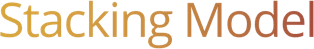

## Building the Ultimate Stacking Model

Welcome to the guide that takes your machine learning skills to the next level! 🚀 In this tutorial, we’ll explore how to create a stacking model by combining the best of Decision Tree, Random Forest, SVM, KNN, and MLP. Each model will go through rigorous Hyperparameter Tuning to optimize performance before we stack them together into the ultimate computational powerhouse. Think of it as assembling the Avengers of machine learning! 🦸‍♂️🤖

But before we dive into the stacking magic, pre-work is critical. Like any great recipe, the secret lies in preparation! We’ll start by shuffling the dataset to eliminate bias and applying SMOTE to handle any pesky class imbalances, ensuring our data is clean, balanced, and ready for action.

Check out the linked video for a deeper dive, and let’s connect to share insights and experiments. Together, we can push the boundaries of what machine learning can achieve! 💡✨

Introdution Video Link: https://www.youtube.com/watch?v=a5CpIumG6Aw

In [ ]:
# Install required packages
!pip install imbalanced-learn scikit-learn -q

In [ ]:
# Import required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from google.colab import files

In [ ]:
# Load Data
uploaded = files.upload()  # Upload Data
df = pd.read_csv('RevisedHomesiteTrain1.csv')


Saving RevisedHomesiteTrain1.csv to RevisedHomesiteTrain1 (3).csv


In [ ]:
print(df)

       CoverageField11A  CoverageField11B  CoverageField1A  CoverageField1B  \
0                     2                 1               17               23   
1                     5                 9                6                8   
2                     4                 6                7               12   
3                    15                23                3                2   
4                     4                 6                8               13   
...                 ...               ...              ...              ...   
64995                 3                 5                9               15   
64996                 5                 9               14               21   
64997                 7                14                3                2   
64998                 5                 9               15               22   
64999                 4                 6                7               12   

       CoverageField2A  CoverageField2B  CoverageFi

In [ ]:
# Random Sampling
df = df.sample(frac=0.03076923076, random_state=42).reset_index(drop=True)
print(f"Dataset shape after sampling: {df.shape}")

Dataset shape after sampling: (2000, 596)


In [ ]:
# check missing data
missing_count = df.isnull().sum().sum()
if missing_count > 0:
    print(f"Dataset contains {missing_count} missing values. Dropping rows with missing data...")
    df = df.dropna().reset_index(drop=True)
    print(f"Dataset shape after dropping missing data: {df.shape}")
else:
    print("No missing values detected.")


No missing values detected.


In [ ]:
# escape the feature and the label
X = df.drop(columns=['QuoteConversion_Flag'])
y = df['QuoteConversion_Flag']
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Features shape: (2000, 595), Target shape: (2000,)


In [ ]:
# upload the module
from sklearn.model_selection import train_test_split

In [ ]:
# shuffle
X, y = X.sample(frac=1, random_state=42).reset_index(drop=True), y.sample(frac=1, random_state=42).reset_index(drop=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}")

Training set shape: (1600, 595), Validation set shape: (400, 595)


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline # Import ImbPipeline correctly

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# build the range of SMOTE paramater
smote_params = {
    'smote__sampling_strategy': [0.5, 0.7, 1.0],
    'smote__k_neighbors': [3, 5, 7],
    'smote__random_state': [42]
}

# Build base models and integrate SMOTE and scaling
base_models = {
    "Decision Tree": ImbPipeline([('smote', SMOTE()), ('model', DecisionTreeClassifier())]),
    "Random Forest": ImbPipeline([('smote', SMOTE()), ('model', RandomForestClassifier())]),
    "SVM": ImbPipeline([('smote', SMOTE()), ('scaler', StandardScaler()), ('model', SVC(probability=True))]),
    "KNN": ImbPipeline([('smote', SMOTE()), ('scaler', StandardScaler()), ('model', KNeighborsClassifier())]),
    "MLP": ImbPipeline([('smote', SMOTE()), ('scaler', StandardScaler()), ('model', MLPClassifier(max_iter=500))])
}


In [ ]:
# hyperparameter adgustment
best_base_models = {}
for name, pipeline in base_models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(estimator=pipeline, param_grid=smote_params, cv=3, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    best_base_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")

Tuning hyperparameters for Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for Decision Tree: {'smote__k_neighbors': 5, 'smote__random_state': 42, 'smote__sampling_strategy': 0.7}
Best score for Decision Tree: 0.8343721380169722
Tuning hyperparameters for Random Forest...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for Random Forest: {'smote__k_neighbors': 5, 'smote__random_state': 42, 'smote__sampling_strategy': 0.5}
Best score for Random Forest: 0.8624983311198712
Tuning hyperparameters for SVM...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for SVM: {'smote__k_neighbors': 3, 'smote__random_state': 42, 'smote__sampling_strategy': 0.5}
Best score for SVM: 0.851872542061635
Tuning hyperparameters for KNN...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for KNN: {'smote__k_neighbors': 7, 'smote__random_state': 42, 'smote__sampling_strategy': 0.5}
Best

In [ ]:
# build StackingClassifier
estimators = [(name, model) for name, model in best_base_models.items()]
meta_model = RandomForestClassifier(random_state=42)
stacked_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# build StackingClassifier and work hyperparameter
meta_model = RandomForestClassifier(random_state=42)
estimators = [(name, model) for name, model in best_base_models.items()]
stacked_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)

stacked_param_grid = {
    'final_estimator__n_estimators': [50, 100],
    'final_estimator__max_depth': [10, 20, None],
    'final_estimator__min_samples_split': [2, 5],
    'final_estimator__min_samples_leaf': [1, 2],
    'final_estimator__bootstrap': [True]
}

print("Tuning hyperparameters for the stacked model using RandomizedSearchCV...")
stacked_random_search = RandomizedSearchCV(
    estimator=stacked_model,
    param_distributions=stacked_param_grid,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)
stacked_random_search.fit(X_train, y_train)

Tuning hyperparameters for the stacked model using RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=3,
                   estimator=StackingClassifier(estimators=[('Decision Tree',
                                                             Pipeline(steps=[('smote',
                                                                              SMOTE(random_state=42,
                                                                                    sampling_strategy=0.7)),
                                                                             ('model',
                                                                              DecisionTreeClassifier())])),
                                                            ('Random Forest',
                                                             Pipeline(steps=[('smote',
                                                                              SMOTE(random_state=42,
                                                                                    sampling_strategy=0.5)),
                                                                             ('model',
                                                                              RandomForestClassifier())])),
                                                            ('SVM',
                                                             Pipeline(steps=[('smote',
                                                                              SMO...
                                                                              MLPClassifier(max_iter=500))]))],
                                                final_estimator=RandomForestClassifier(random_state=42)),
                   n_jobs=-1,
                   param_distributions={'final_estimator__bootstrap': [True],
                                        'final_estimator__max_depth': [10, 20,
                                                                       None],
                                        'final_estimator__min_samples_leaf': [1,
                                                                              2],
                                        'final_estimator__min_samples_split': [2,
                                                                               5],
                                        'final_estimator__n_estimators': [50,
                                                                          100]},
                   random_state=42, scoring='accuracy', verbose=1)

# 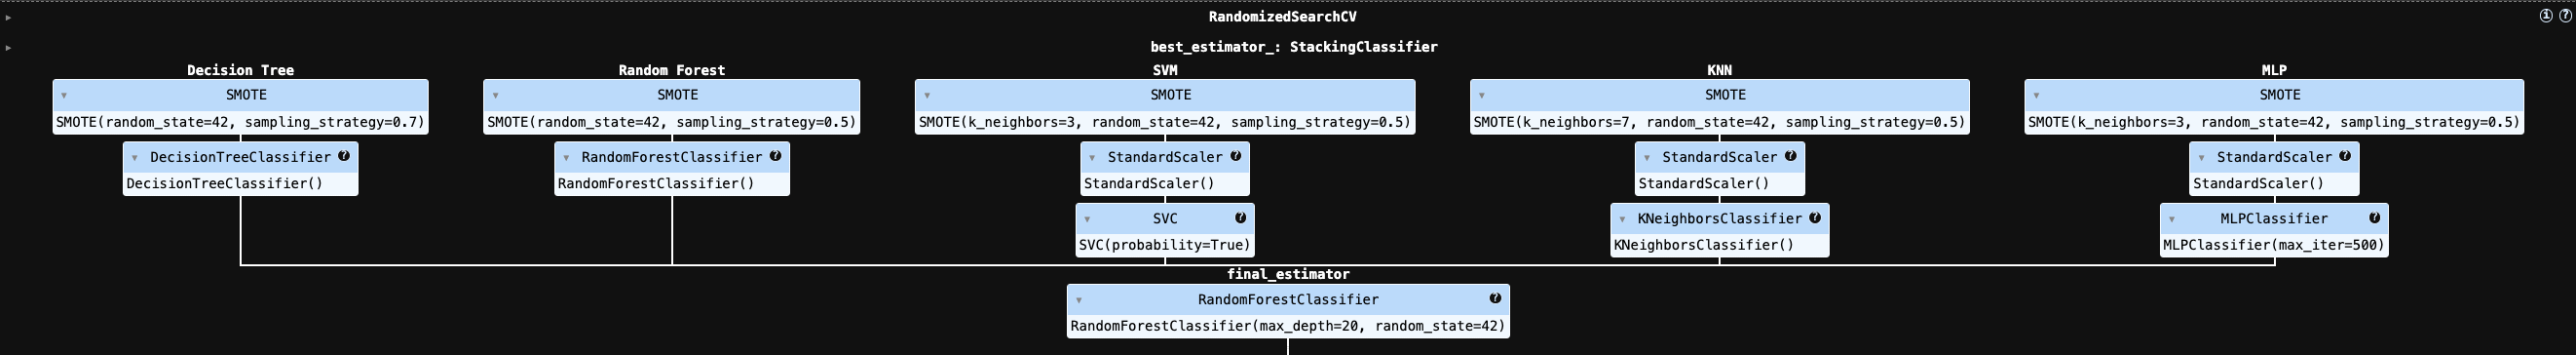

In [ ]:
# Optimization stacking model
best_stacked_model = stacked_random_search.best_estimator_
print(f"Best parameters for stacked model: {stacked_random_search.best_params_}")
print(f"Best score for stacked model: {stacked_random_search.best_score_:.4f}")

Best parameters for stacked model: {'final_estimator__n_estimators': 100, 'final_estimator__min_samples_split': 2, 'final_estimator__min_samples_leaf': 1, 'final_estimator__max_depth': 20, 'final_estimator__bootstrap': True}
Best score for stacked model: 0.8656


In [ ]:
# doing prediction on validation datasets
y_val_pred = best_stacked_model.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       339
           1       0.66      0.54      0.59        61

    accuracy                           0.89       400
   macro avg       0.79      0.75      0.76       400
weighted avg       0.88      0.89      0.88       400



In [ ]:
# predict testing data
uploaded = files.upload()  # upload file document
test_data = pd.read_csv('RevisedHomesiteTest1.csv')
print(f"Test data loaded with shape: {test_data.shape}")

Saving RevisedHomesiteTest1.csv to RevisedHomesiteTest1 (2).csv
Test data loaded with shape: (173836, 596)


In [ ]:
from multiprocessing import Value
quote_numbers = test_data['QuoteNumber'].values
new_test_data = test_data.drop(columns=['GeographicField64']).copy()
print(f"New test data shape after dropping 'GeographicField64': {new_test_data.shape}")

New test data shape after dropping 'GeographicField64': (173836, 595)


In [ ]:
# checking testing dataset using stacking model
test_predictions = best_stacked_model.predict(new_test_data)

In [ ]:

output = pd.DataFrame({
    'QuoteNumber': quote_numbers,
    'QuoteConversion_Flag': test_predictions
})


output_file = 'test_predictions.csv'
output.to_csv(output_file, index=False, header=True)
files.download(output_file)
print(f"Test predictions saved to {output_file} and ready for download.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test predictions saved to test_predictions.csv and ready for download.
